In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from pici.pici import Pici
from pici.communities.oem import OEMCommunityFactory
from pici.communities.osm import OSMCommunityFactory
from pici.communities.preciousplastic import PPCommunityFactory
import pandas as pd

from pici.labelling import InnovationLabels
import seaborn as sns


import plotly.express as ex

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'infomap', 'wurlitzer', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [3]:
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.options.plotting.backend = "plotly"
plt.rcParams['figure.dpi'] = 200

In [5]:
pici = Pici(
    communities={
        'OpenEnergyMonitor': OEMCommunityFactory,
        'OpenStreetMap': OSMCommunityFactory,
        'PreciousPlastic': PPCommunityFactory,
    },
    labels=[
        InnovationLabels(
            pd.read_excel("../test_integrated_labels.xlsx")
        ),
        InnovationLabels().from_limesurvey(
            pd.read_excel("../results-664322-815628_2022-08-16.xlsx"),
            drop_labellers=["Test","test"]
        )
    ],
    cache_dir='../../../cache',
    start='2017-01-01',
    end='2019-01-01',
    cache_nrows=500
)

In [6]:
label_stats = pici.labels.labels[0].stats

In [7]:
print(pici.labels.labels[0])

<class 'pici.labelling.InnovationLabels'>
   Level: topics
   Labelled entities: 1245
   Labels (cols): 8
   Labellers: 16
   Communities: 3



In [8]:
pici.labels.labels[0].data.to_csv('flattened_results-664322-815628_2022-08-16.csv')

In [26]:
pici.labels.labels[0].data

,labeller,community_name,url,label_idea,label_evaluation,label_implementation,label_modification,label_improvement,label_potential,label_any_activity,label_has_potential,id
0,anna+philipp,OpenEnergyMonitor,https://community.openenergymonitor.org/t/iota...,False,False,False,False,False,0,False,False,6129
1,anna+philipp,OpenEnergyMonitor,https://community.openenergymonitor.org/t/new-...,False,False,True,True,True,1,True,True,6402
2,anna+philipp,OpenEnergyMonitor,https://community.openenergymonitor.org/t/read...,True,True,True,True,False,1,True,True,4165
3,anna+philipp,OpenEnergyMonitor,https://community.openenergymonitor.org/t/graf...,True,True,True,True,True,2,True,True,9829
4,anna+philipp,OpenEnergyMonitor,https://community.openenergymonitor.org/t/lots...,False,False,False,False,False,0,False,False,6749
...,...,...,...,...,...,...,...,...,...,...,...,...
198,xwegner_lgh@outlook.de,OpenStreetMap,https://forum.openstreetmap.org/viewtopic.php?...,False,True,False,True,False,0,True,False,57890
199,xwegner_lgh@outlook.de,OpenStreetMap,https://forum.openstreetmap.org/viewtopic.php?...,False,False,False,False,False,0,False,False,60255
200,xwegner_lgh@outlook.de,OpenStreetMap,https://forum.openstreetmap.org/viewtopic.php?...,False,False,False,False,False,0,False,False,66469
201,xwegner_lgh@outlook.de,OpenStreetMap,https://forum.openstreetmap.org/viewtopic.php?...,False,False,False,False,False,0,False,False,60912


In [9]:
label_stats.label_correlation()

,label_idea,label_evaluation,label_implementation,label_modification,label_improvement,label_any_activity,label_has_potential
label_idea,1.000000,0.639468,0.297164,0.317945,0.252564,0.728848,0.584070
label_evaluation,0.639468,1.000000,0.426639,0.468480,0.335450,0.742551,0.551619
label_implementation,0.297164,0.426639,1.000000,0.384947,0.284734,0.406485,0.285356
label_modification,0.317945,0.468480,0.384947,1.000000,0.502615,0.541442,0.330230
label_improvement,0.252564,0.335450,0.284734,0.502615,1.000000,0.418483,0.302218
label_any_activity,0.728848,0.742551,0.406485,0.541442,0.418483,1.000000,0.565569
label_has_potential,0.584070,0.551619,0.285356,0.330230,0.302218,0.565569,1.000000


In [10]:
label_stats.plot_label_correlation()

In [11]:
label_stats.label_counts(normalize=True)

label_idea              0.382329
label_evaluation        0.391165
label_implementation    0.161446
label_modification      0.254618
label_improvement       0.169478
label_any_activity      0.538153
label_has_potential     0.314859
dtype: float64

In [12]:
label_stats.label_counts(normalize=True).plot(kind='bar')

In [13]:
label_stats.label_counts_by_labeller(normalize=True)

,label_idea,label_evaluation,label_implementation,label_modification,label_improvement,label_any_activity,label_has_potential
labeller,,,,,,,
Annabanana,0.600000,0.400000,0.300000,0.100000,0.000000,0.600000,0.600000
Jan P.,0.702128,0.617021,0.148936,0.308511,0.255319,0.723404,0.553191
Jan-Philipp (JP),0.554054,0.472973,0.135135,0.256757,0.297297,0.702703,0.527027
Jonathan1.732,0.344444,0.255556,0.088889,0.066667,0.044444,0.366667,0.333333
Larilu,0.232432,0.227027,0.081081,0.048649,0.016216,0.259459,0.243243
Phoebetan310@gmail.com,0.000000,0.000000,0.400000,0.000000,0.000000,0.400000,0.200000
anna+philipp,0.484536,0.432990,0.164948,0.226804,0.288660,0.659794,0.422680
cmcuza@gmail.com,0.051429,0.000000,0.040000,0.051429,0.005714,0.137143,0.091429
elisagleu@gmail.com,0.294118,0.517647,0.352941,0.223529,0.247059,0.611765,0.423529


In [14]:
label_stats.plot_label_counts_by_labeller()

In [15]:
label_stats.plot_label_counts_by_labeller(normalize=False)

In [16]:
def plot_label_selections(labels, top_n=20, use_labels=None, exclude=[], figsize=(8,10), variant='topn'):
    colors = ["#fae6d9", "#60b3cc", "#00769a"]
    customPalette = sns.set_palette(sns.color_palette(colors))
    bluePalette = sns.color_palette("Blues", as_cmap=True)
    piPalette = sns.light_palette("#00769a", as_cmap=True)
    piPalette2 = sns.light_palette("#f17d32", as_cmap=True)
    sns.set(font="Corbel")

    def plt_label_heatmap(query=None, top_n=top_n, title="", cmap=None):
        if use_labels is None:
            labs = list(set(labels.labels.keys()) - set(exclude))
        else:
            labs = use_labels
        if query is not None:
            ldata = labels.data.query(query)[labs]
        else:
            ldata = labels.data[labs]

        if variant == 'topn':
            heatmap = ldata.value_counts(ascending=False, normalize=True).reset_index(name='freq').head(20).astype(float)
            annot = heatmap.copy()
            annot[labs] = ''
            annot['freq'] = (annot.freq * 100).apply(round).astype(str).apply(lambda s: s + ' %')
            annot.set_index('freq', inplace=True)
            #sns.heatmap(heatmap, annot=annot, fmt='', linewidths=1, ax=ax, cmap=cmap, cbar=False)
            heatmap['freq'] = (heatmap.freq * 100).apply(round).astype(str).apply(lambda s: s + '%')
            heatmap.columns = [c.replace("label_","") for c in heatmap.columns]
            heatmap = heatmap.set_index('freq').T
            sns.heatmap(heatmap, linewidths=1, ax=ax, cmap=cmap, cbar=False)
        elif variant == 'all':
            hm2 = ldata.astype(float)
            #hm2['sm'] = hm2.sum(axis=1)
            hm2 = hm2.sort_values(by=list(hm2.columns), ascending=True, na_position='first')
            hm2 = hm2[labs]
            hm2.columns = [c.replace("label_","") for c in hm2.columns]
            # sns.heatmap(heatmap, linewidths=1, ax=ax, cmap=cmap, cbar=False)
            sns.heatmap(hm2.T, linewidths=0, ax=ax, cmap=cmap, cbar=False)
            ax.invert_xaxis()
            ax.xaxis.set_tick_params(labelcolor='white', labelrotation=0)

        ax.set_title(title + f" (n={ldata.shape[0]})", weight='bold', size=16)
        ax.set_facecolor('thistle')
        #ax.tick_params(labelleft=False)
        for tick in ax.get_yticklabels():
            tick.set_rotation(0)
            tick.set_fontweight('bold')
            tick.set_color('grey')
        ax.tick_params(direction='inout')
        ax.yaxis.set_tick_params(labelsize=12)
        ax.set(xlabel=None)
        ax.set(ylabel=None)
        # ax.invert_yaxis()

    cs = labels.data.community_name.unique()
    fig, axes = plt.subplots(len(cs)+1,1, figsize=figsize)
    params = [(None, "total", piPalette)] + [
        (f'community_name == "{c}"', c, piPalette2) for c in cs
    ]
    for p, ax in zip(params, axes):
        plt_label_heatmap(
            query=p[0],
            title=p[1],
            cmap=p[2]
        )

    plt.tight_layout()

    #return fig

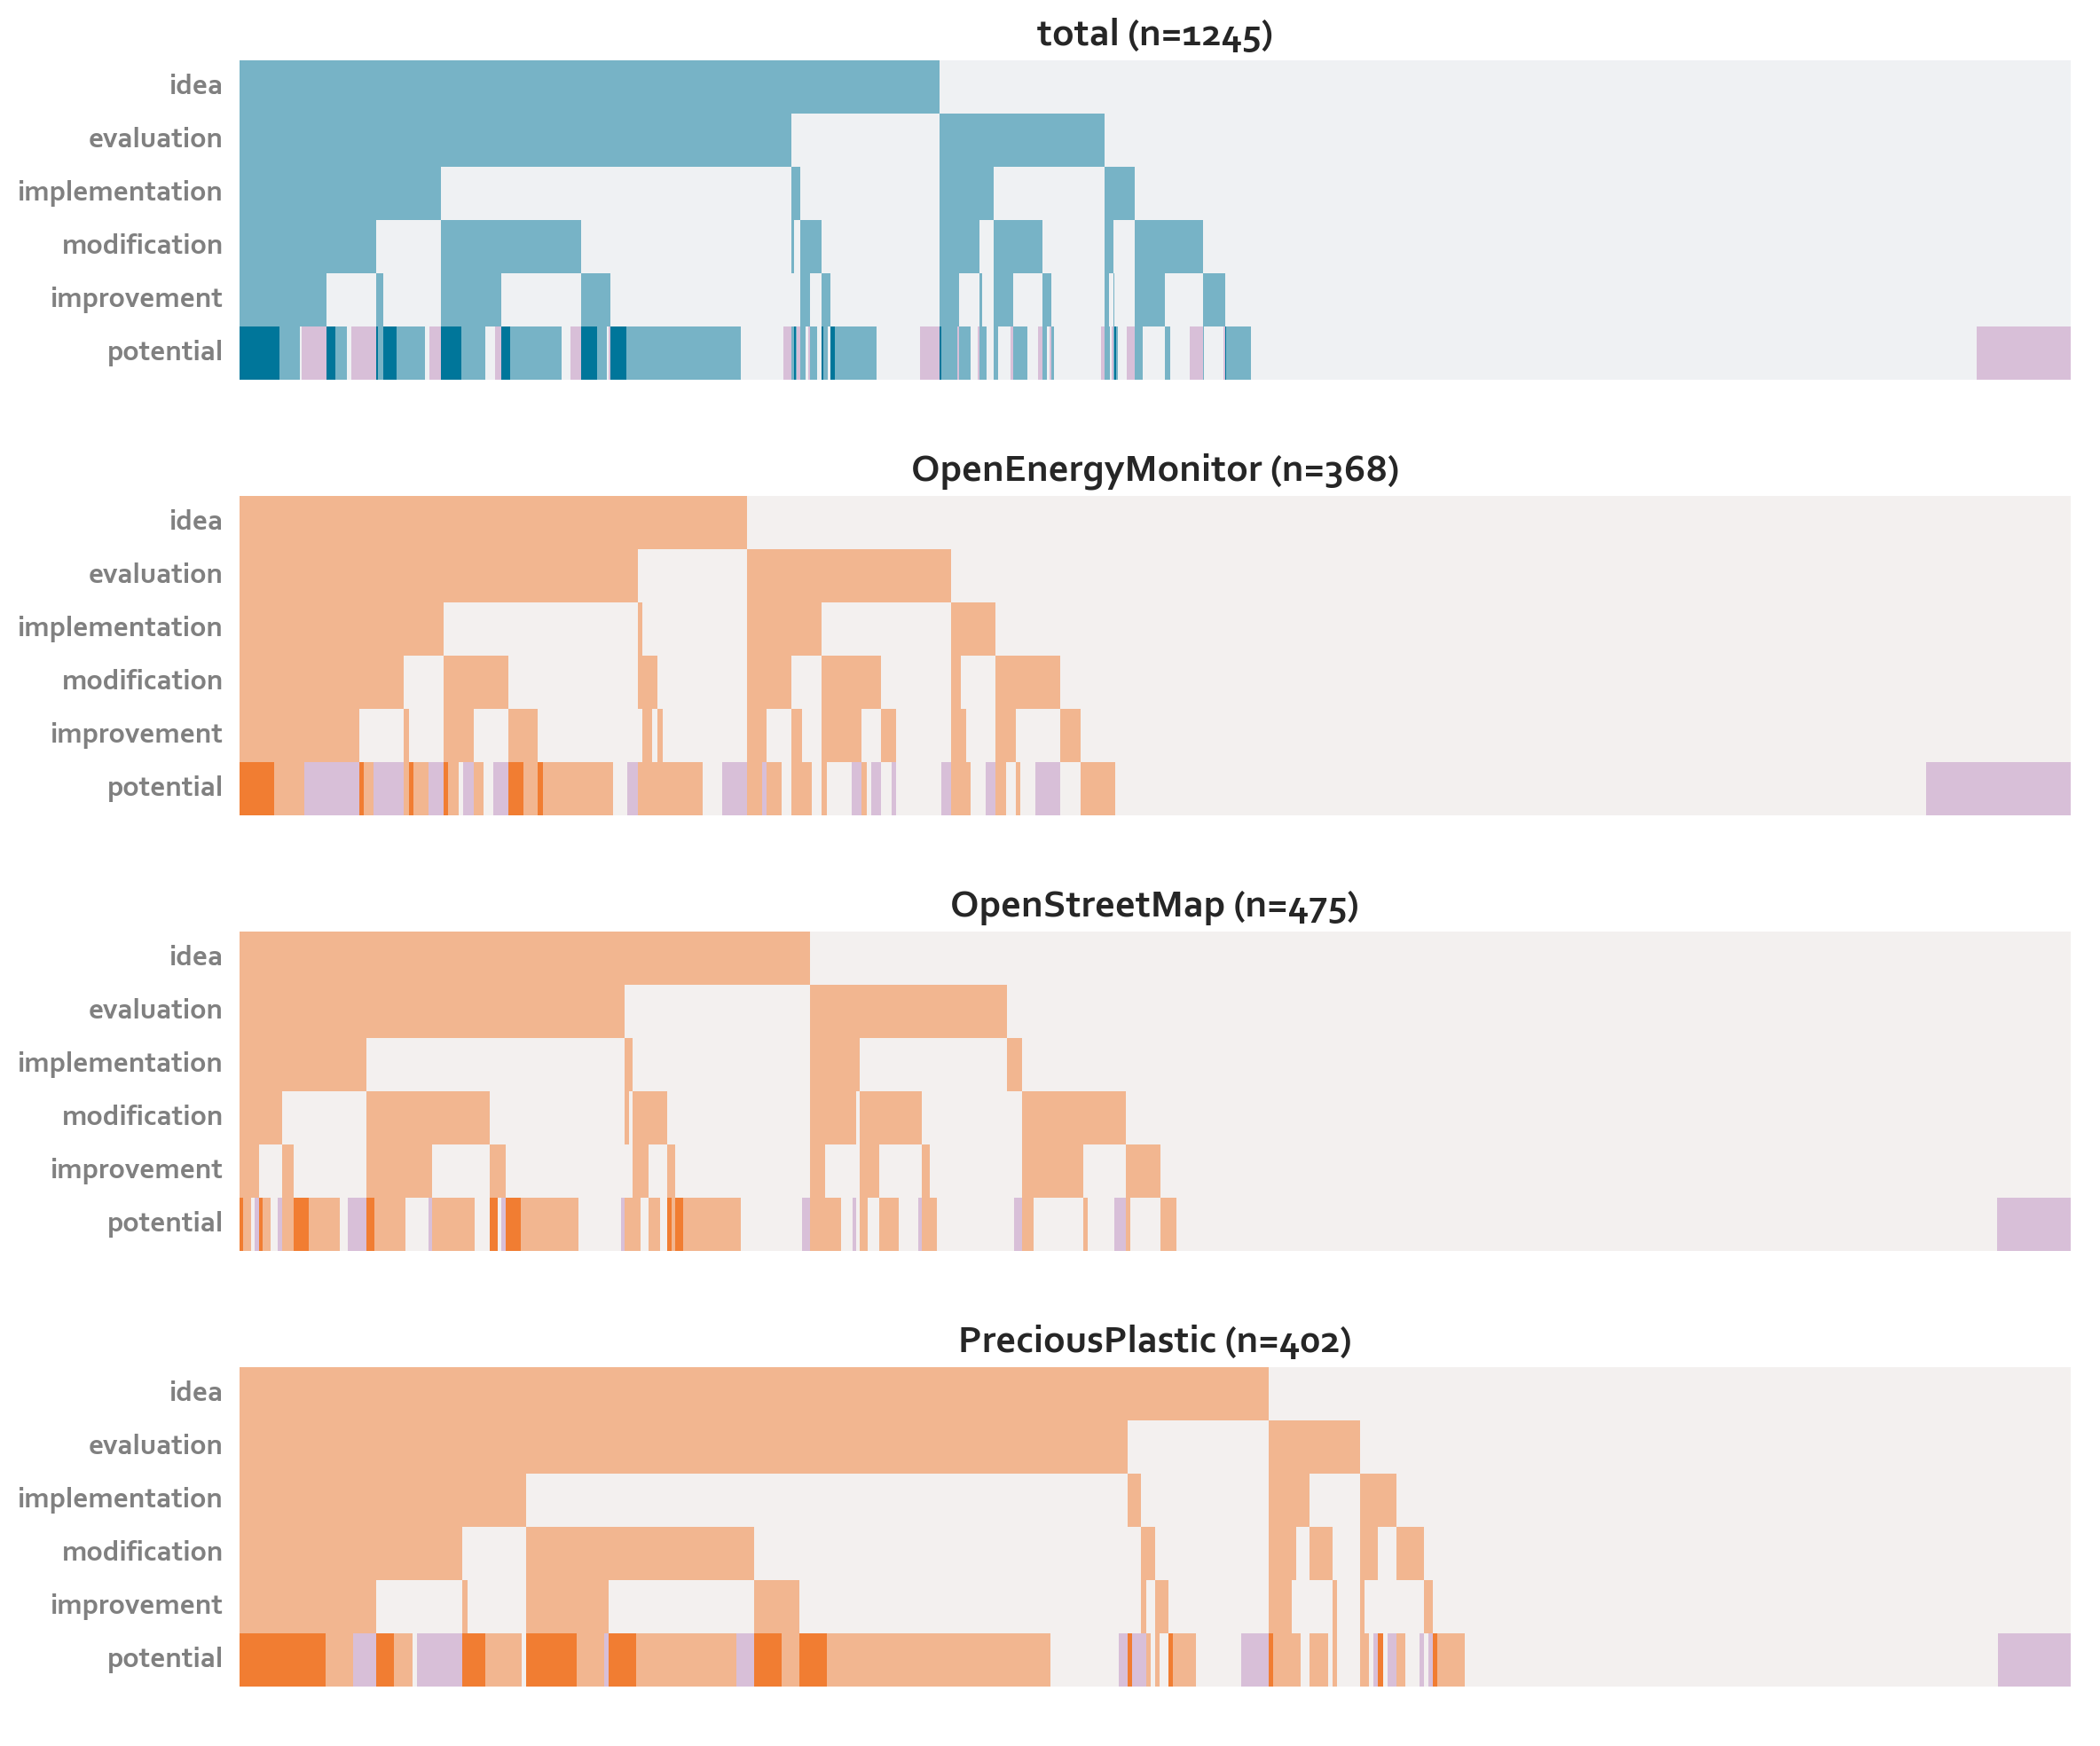

In [17]:
plot_label_selections(
    pici.labels.labels[0],
    use_labels=[
        "label_idea", "label_evaluation","label_implementation","label_modification","label_improvement","label_potential"
    ],
    variant='all',
    figsize=(12,10)
)

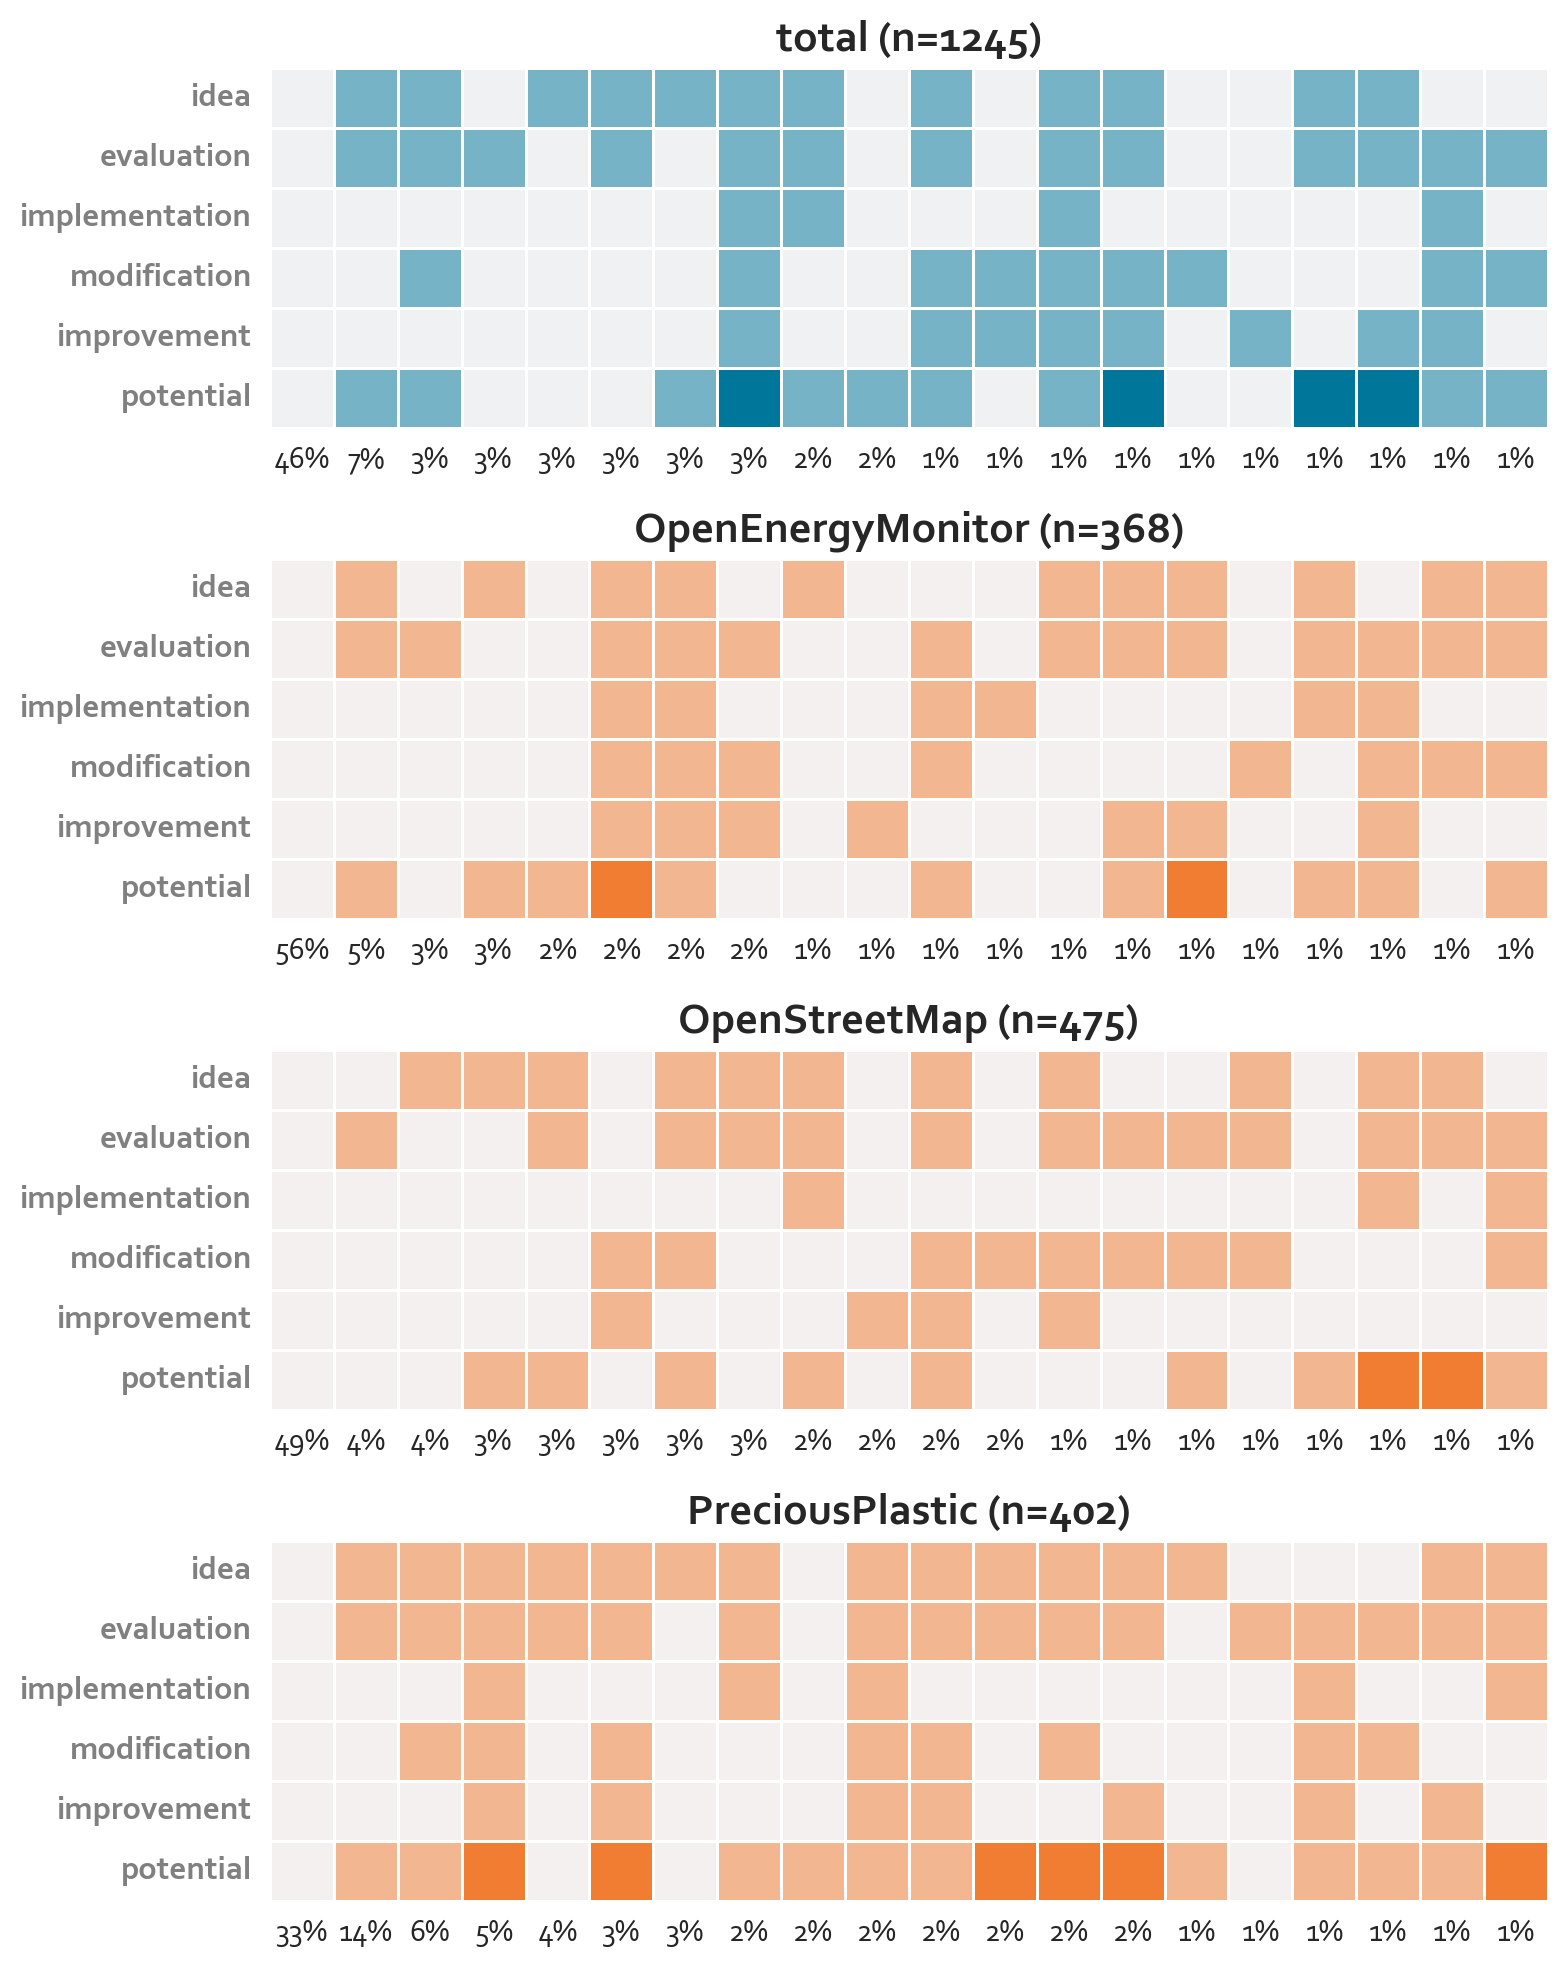

In [18]:
plot_label_selections(
    pici.labels.labels[0],
    use_labels=[
        "label_idea", "label_evaluation","label_implementation","label_modification","label_improvement","label_potential"
    ],
    variant='topn',
    figsize=(8,10),
    top_n=10
)

In [19]:
label_stats.interrater_agreement()

[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

,% complete agreement,base n,Cohen kappa,Fleiss kappa,Krippendorff alpha
label_idea,0.675325,154.0,NaN,NaN,0.493180
label_evaluation,0.590909,154.0,NaN,NaN,0.373167
label_implementation,0.623377,154.0,NaN,NaN,0.128714
label_modification,0.629870,154.0,NaN,NaN,0.305769
label_improvement,0.662338,154.0,NaN,NaN,0.248070
label_potential,0.651515,132.0,NaN,NaN,0.630465
label_any_activity,0.623377,154.0,NaN,NaN,0.404835
label_has_potential,0.642857,154.0,NaN,NaN,0.411019


In [20]:
label_stats.plot_interrater_agreement()

[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [21]:
goldstandard="anna+philipp"
agr = label_stats.pairwise_interrater_agreement(goldstandard=goldstandard, min_comparisons=1)

[array([ 1.,  1.,  0.,  1.,  0., nan,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1., nan,  0., nan,  1.,  1.,  0.,  0.,  0.,  0., nan,
        0.,  0.,  0.,  0.,  0.,  1., nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  0., nan,  1.,  1., nan,  1.,  0.,  0.,
       nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan,  0., nan, nan,  0.,  1.,  0.,  1.,  1.,  1., nan,  0.,
       nan, nan]), array([nan,  0., nan,  1., nan,  0.,  0., nan, nan, nan, nan, nan, nan,
       nan, nan, nan,  0., nan,  0.,  1., nan,  0.,  0.,  0., nan,  0.,
       nan, nan,  0., nan, nan, nan,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0., nan,  0.,  1

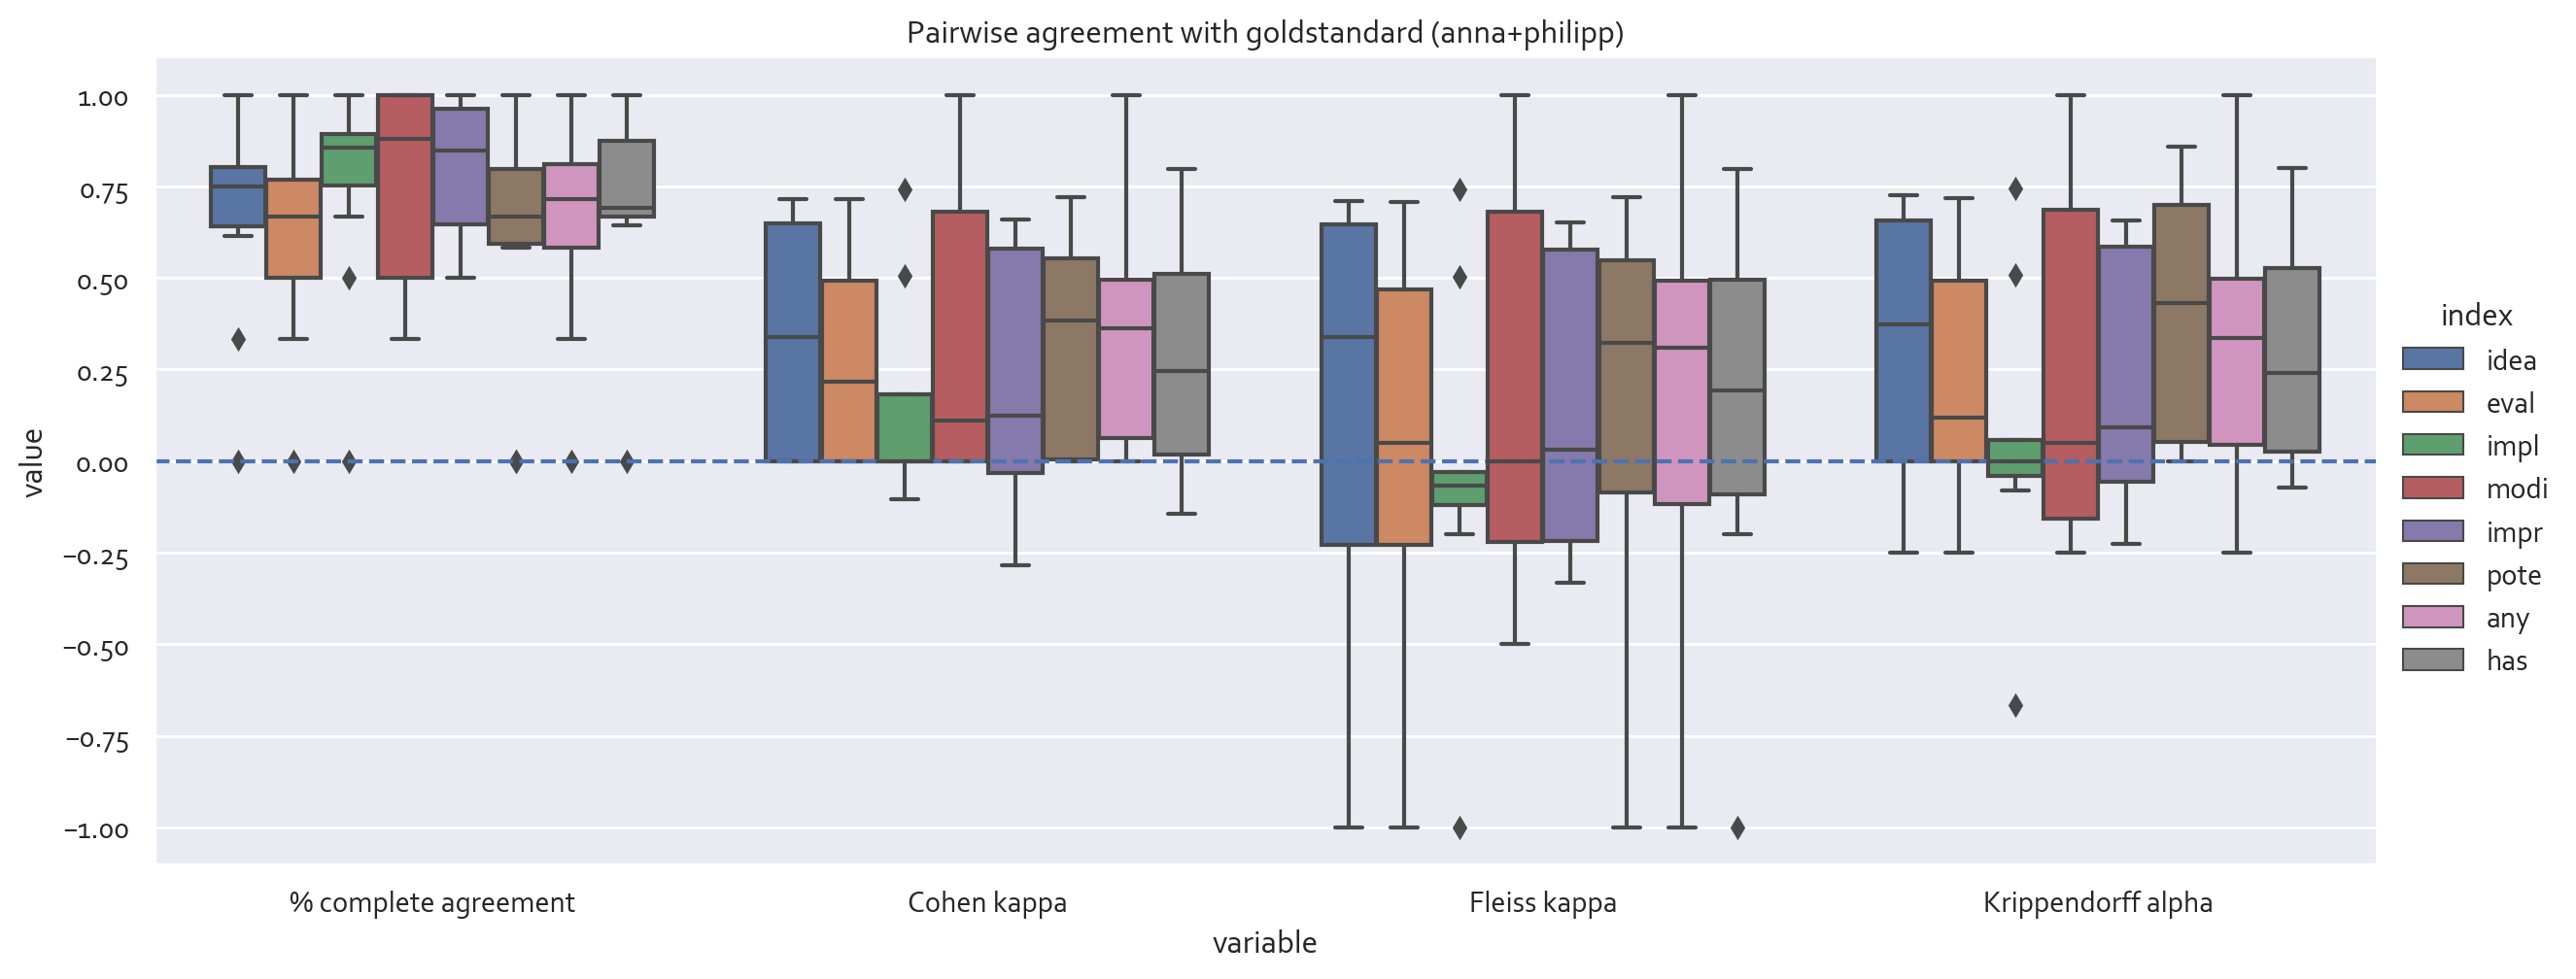

In [22]:
label_stats.plot_goldstandard_agreement(kind='label_boxplots', data=agr).set(
    title=f"Pairwise agreement with goldstandard ({goldstandard})"
)

Text(0.5, 0.98, 'Agreement with goldstandard (anna+philipp)')

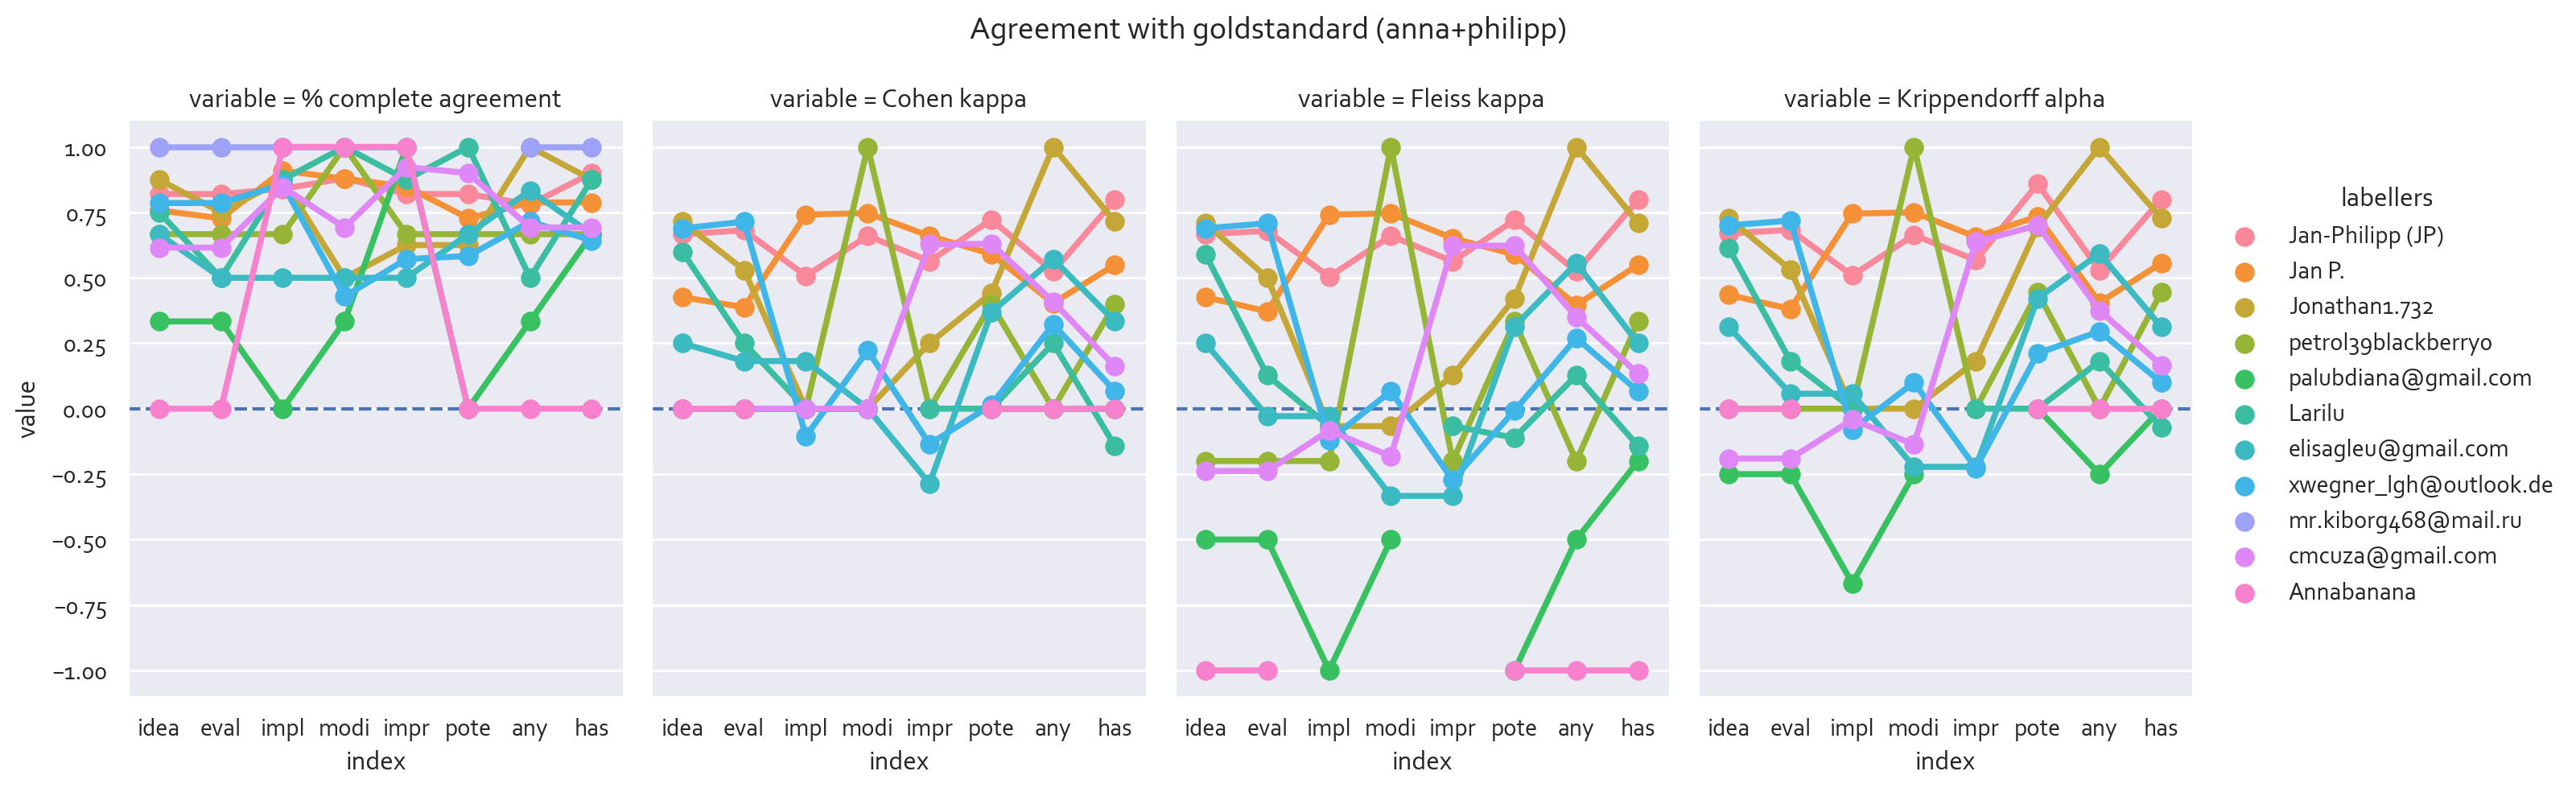

In [23]:
g = label_stats.plot_goldstandard_agreement(kind='labeller_points', data=agr)
g.fig.subplots_adjust(
    top=.85
)
g.fig.suptitle(
    f"Agreement with goldstandard ({goldstandard})"
)

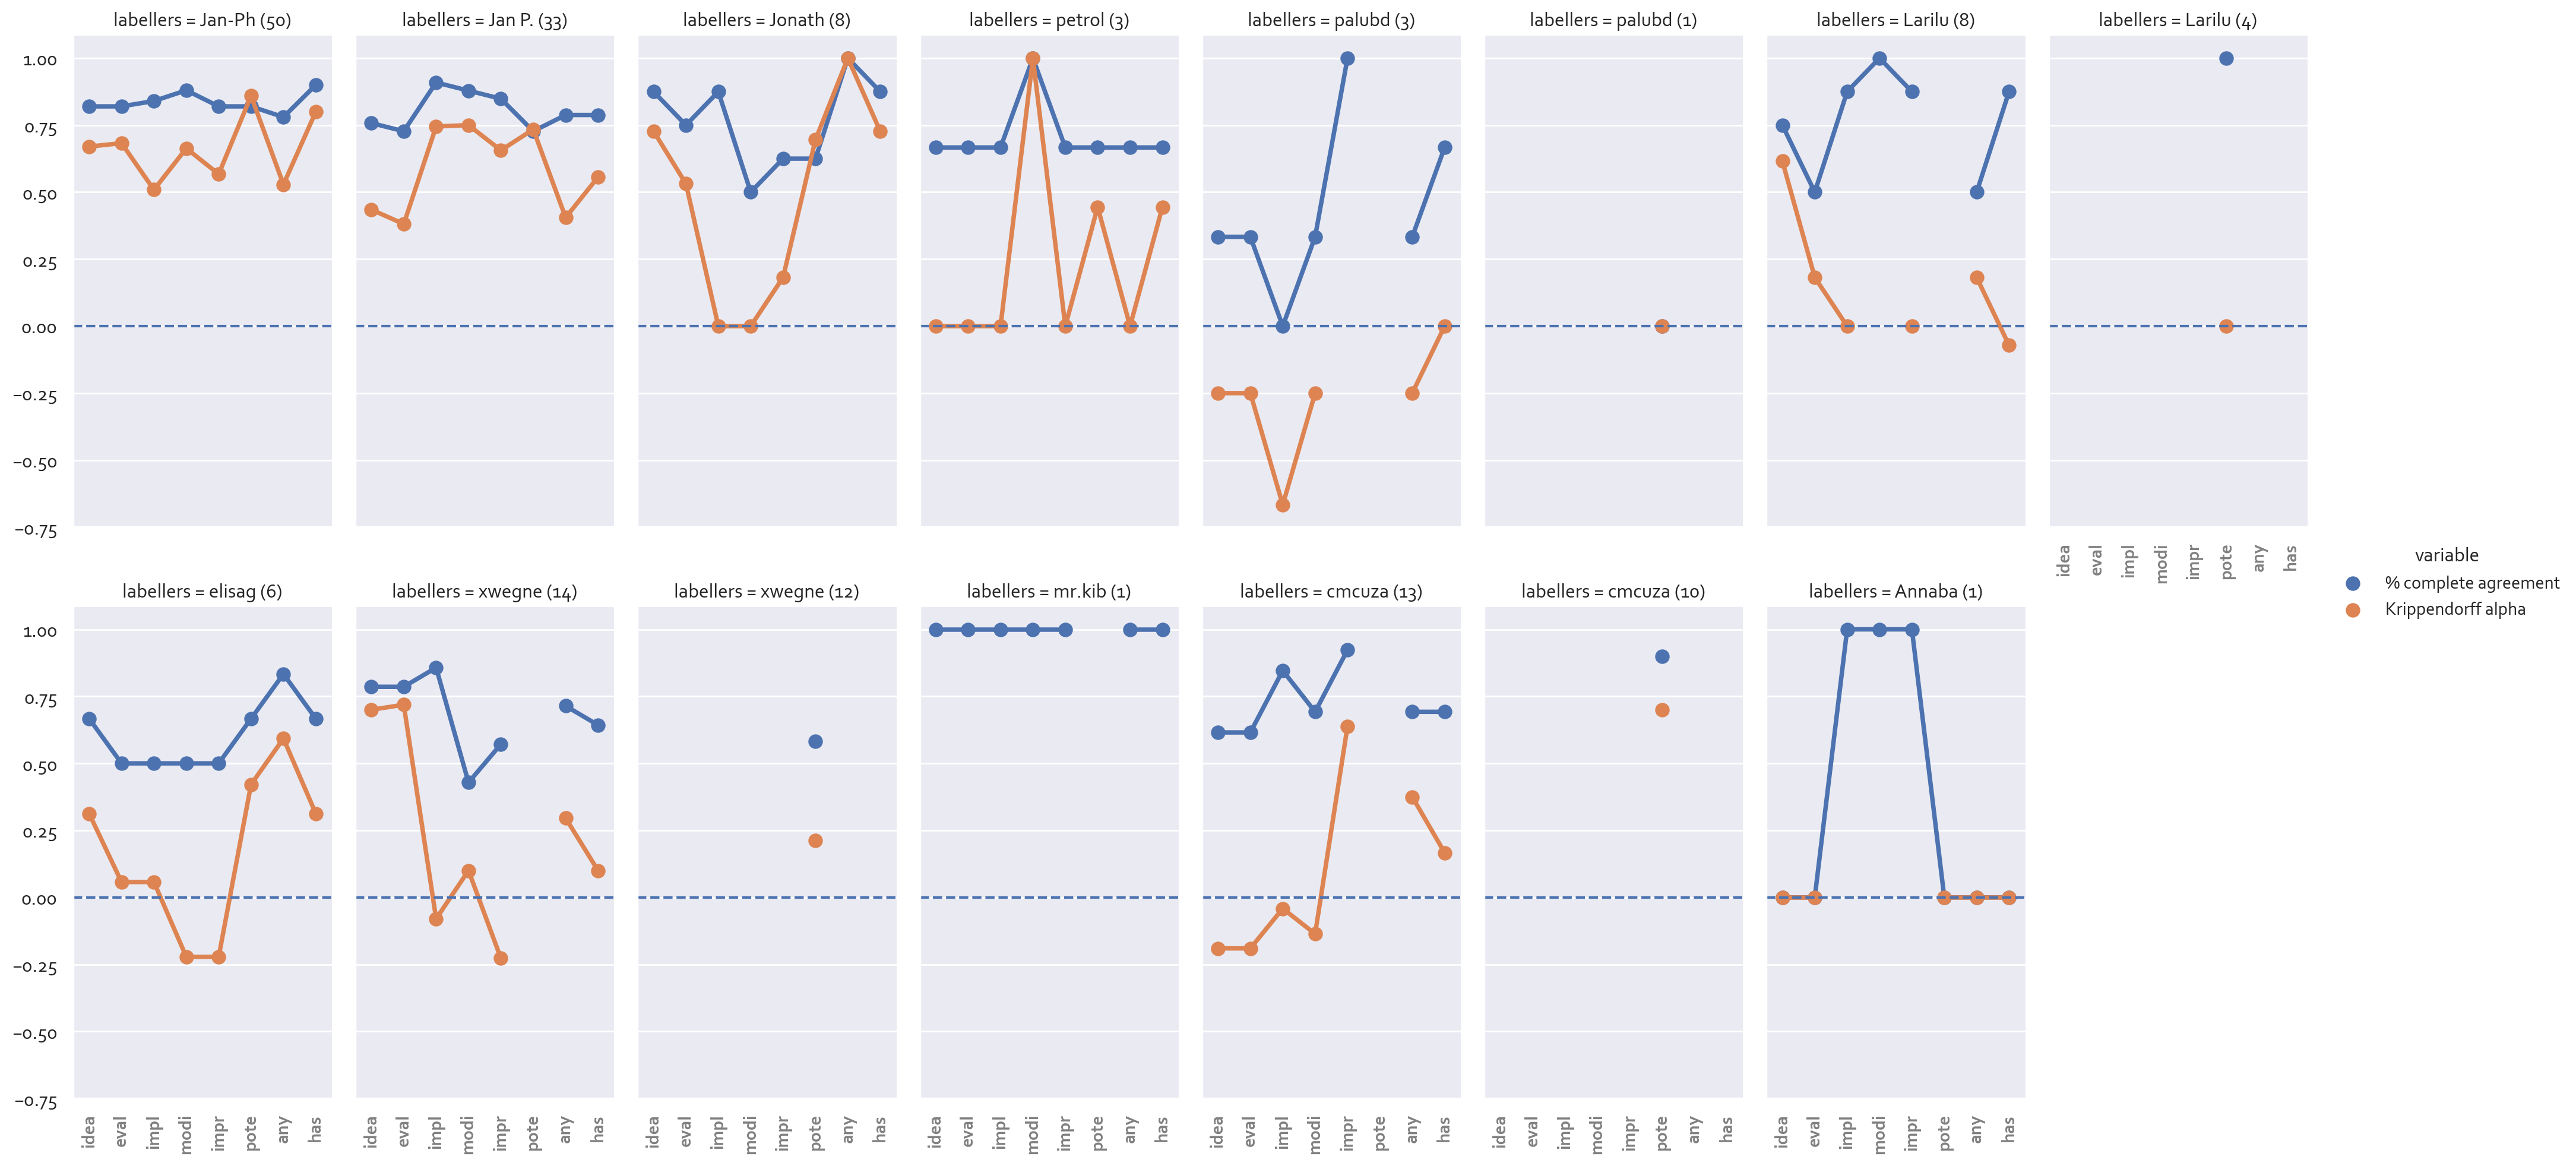

In [24]:
st = pici.labels.labels[0].stats

agr_n = agr
agr_n['labellers'] = agr_n.apply(
    lambda x: f"{x['labellers'][:6]} ({str(int(x['base n']))})",
    axis=1
)
d = st._melt_goldstandard_agreement(agr_n)
d = d[d.variable.isin(["Krippendorff alpha","% complete agreement"])]

g = sns.catplot(x="index", y="value", hue="variable",
                col='labellers', data=d, kind="point",
                figsize=(16,9), aspect=0.5, col_wrap=8)
for ax in g.axes.flatten():
    ax.axhline(0, ls='--')
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontweight('bold')
        tick.set_color('grey')
    ax.yaxis.set_tick_params(labelsize=12)
    ax.set(xlabel=None)
    ax.set(ylabel=None)


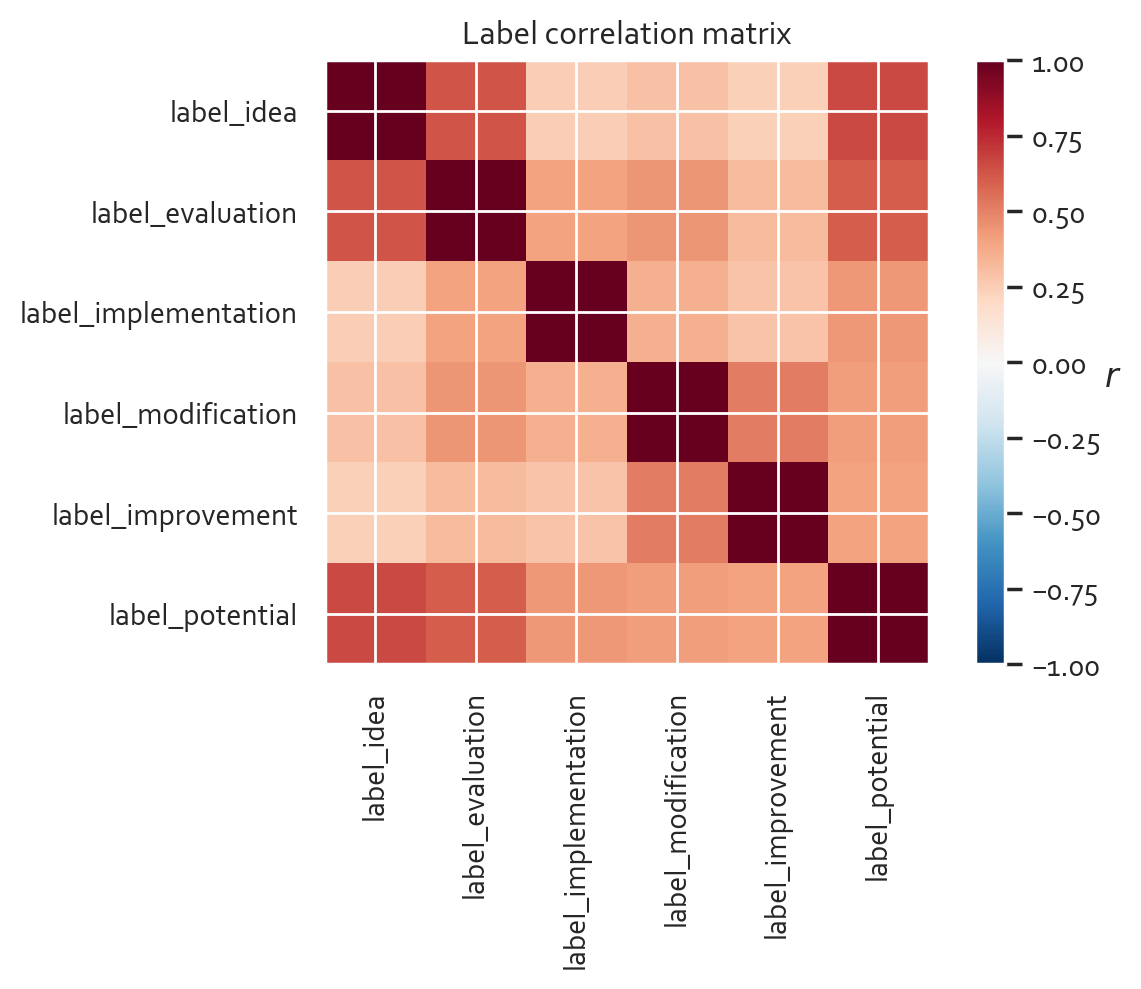

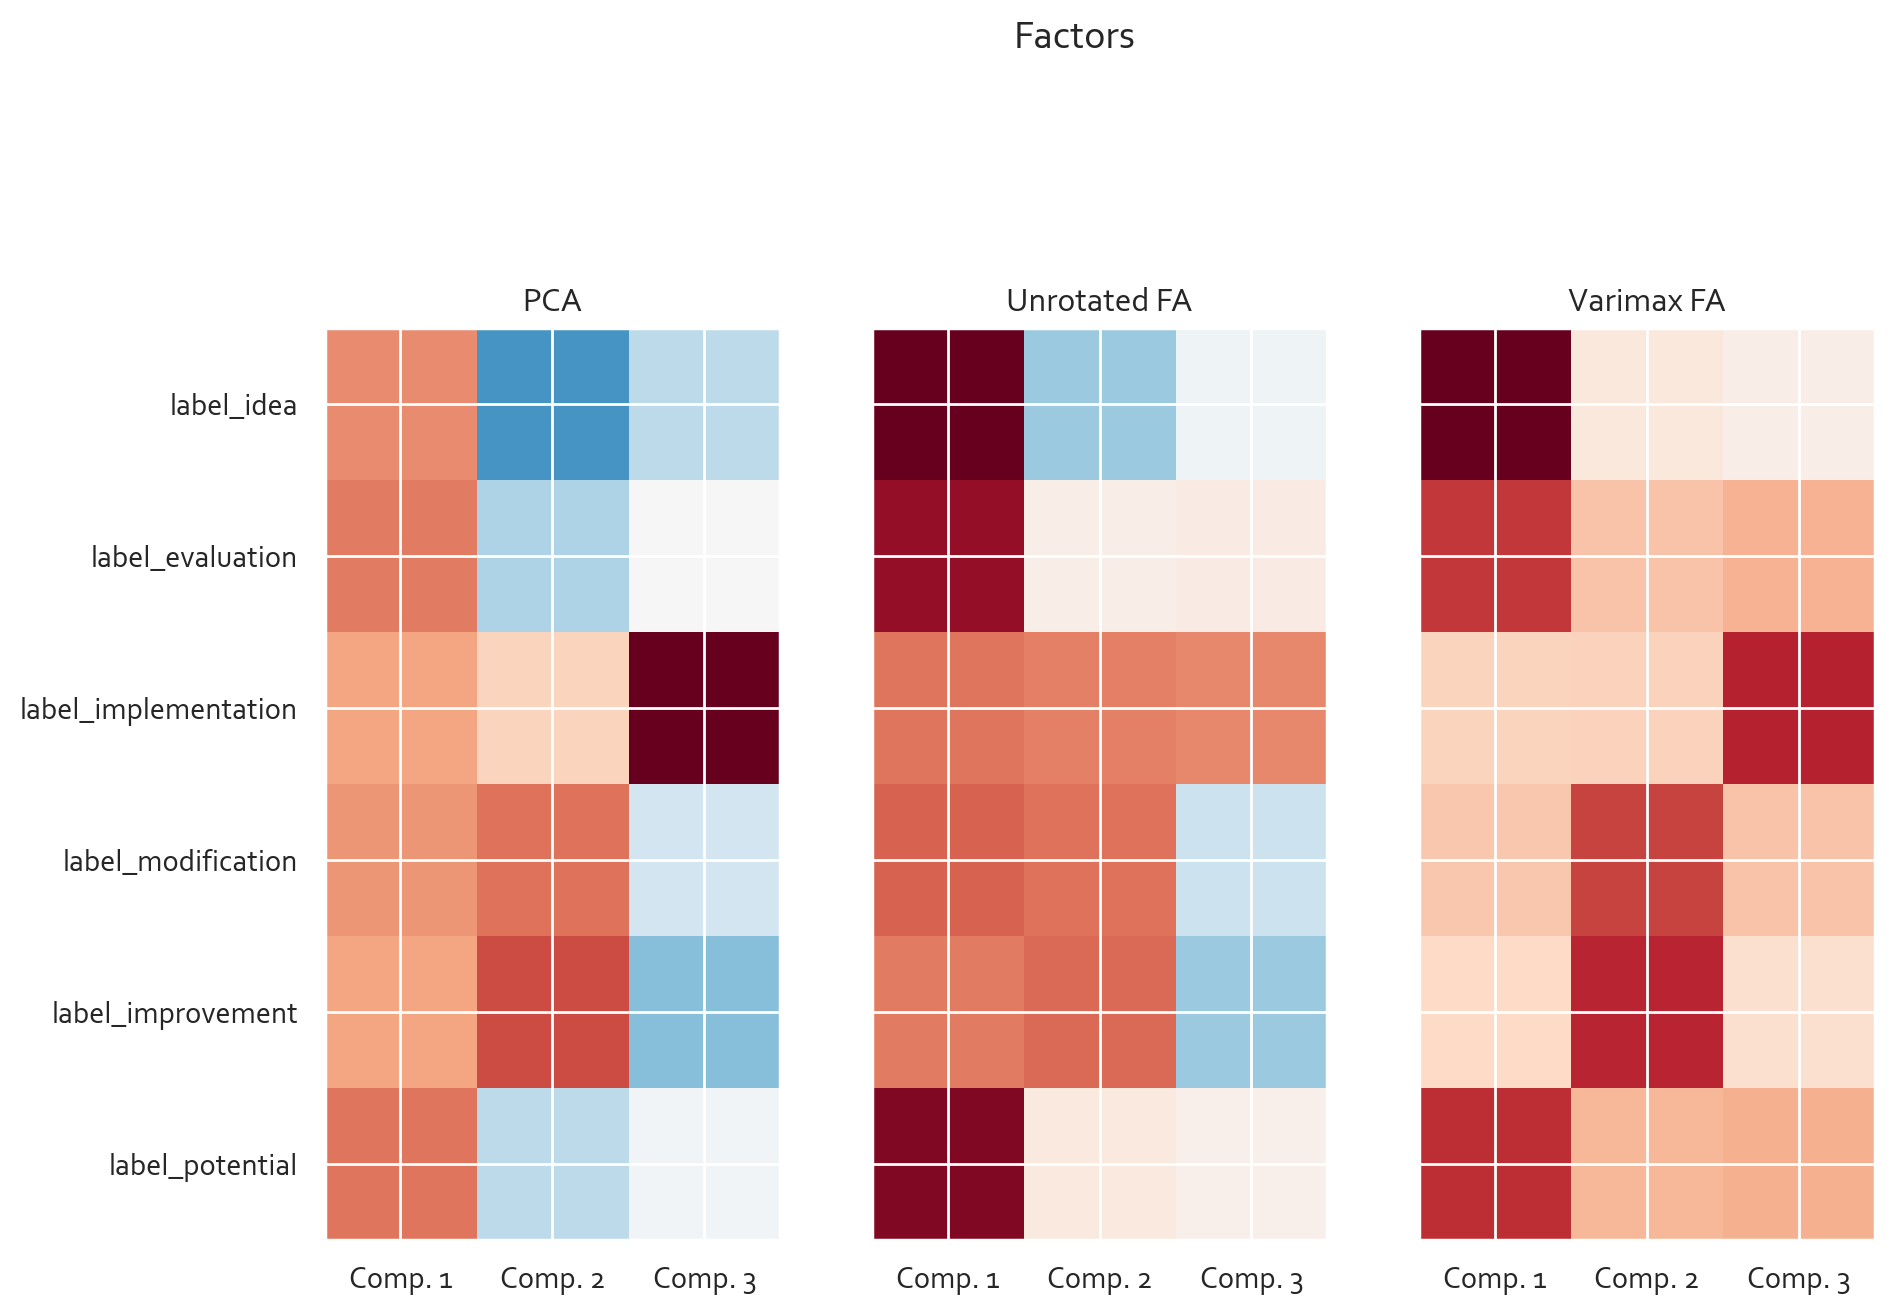

In [25]:
feat_corr, label_loadings = label_stats.plot_latent_model(n_comps=3)